Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Section 6.7.3

Monte Carlo simulations for a Bayesian model of a fictitious election, where incorrect independence assumptions make a crucial difference.\
Topics and relevant videos: [Election forecasting](https://youtu.be/iglSYEcWFKs?si=szm4NfGmINoiPcGA), [Bayesian parametric modeling](https://www.youtube.com/watch?v=G63ZmHg83mg), [independence, conditional independence](https://www.youtube.com/watch?v=gJNArEm5U_A), [the Monte Carlo method](https://www.youtube.com/watch?v=vIY_J85hHdw)

Author: Carlos Fernandez-Granda

In [2]:
from numpy.random import default_rng
import matplotlib.pyplot as plt
import numpy as np

In [3]:
rng = default_rng()

n = 100000
n_print = n/10
p_m = 0.6
p_w = 0.1
s = 51
s_half = 25

plt.close("all")

n_wins = 0.0
res_1 = np.zeros(s+1)
verbose = False
for ind in range(n):
    s_won = 0.0
    for state in range(s):
        r = rng.uniform()
        p = p_m * r + p_w * (1-r)
        s_won += rng.binomial(1,p)
    res_1[int(s_won)] += 1
    if s_won > s_half:
        n_wins += 1
    if verbose and ind > 0 and np.mod(ind,n_print) == 0:
        print('ind: ' + str(ind) + ' prob: ' + str(n_wins/(ind+1)))
p_win_indep = n_wins / n

n_wins = 0.0
res_2 = np.zeros(s+1)
for ind in range(n):
    r = rng.uniform()
    p = p_m * r + p_w * (1-r)
    s_won = rng.binomial(s,p)
    res_2[int(s_won)] += 1
    if s_won > s_half:
        n_wins += 1
    if verbose and ind > 0 and np.mod(ind,n_print) == 0:
        print('ind: ' + str(ind) + ' prob: ' + str(n_wins/(ind+1)))
p_win_dep = n_wins / n

Probability that the Republican wins under independence assumptions: 0.014
Probability that the Republican wins under dependence assumptions: 0.204


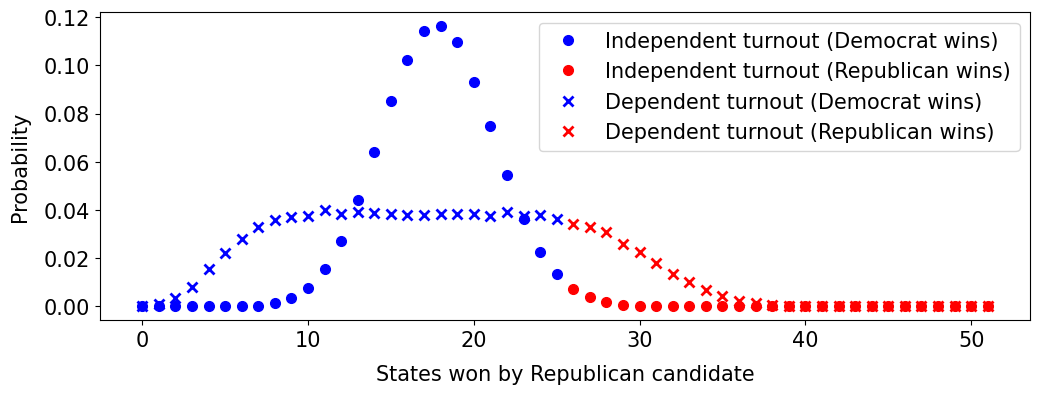

In [5]:
print('Probability that the Republican wins under independence assumptions: ' + str(round(p_win_indep,3)))
print('Probability that the Republican wins under dependence assumptions: ' + str(round(p_win_dep,3)))
font_size = 15
font_size_legend = 15
font_size_ticks = 15

markersize=7
plt.figure(figsize=(12, 4)) 
plt.plot(range(s_half+1),res_1[:s_half+1]/n,'o',ms=markersize,color='blue',label='Independent turnout (Democrat wins)')
plt.plot(np.arange(s_half+1,s+1),res_1[s_half+1:]/n,'o',ms=markersize,color='red',label='Independent turnout (Republican wins)')
# plt.figure()
plt.plot(range(s_half+1),res_2[:s_half+1]/n,'x',mew=2, ms=markersize,color='blue',label='Dependent turnout (Democrat wins)')
plt.plot(np.arange(s_half+1,s+1),res_2[s_half+1:]/n,'x',mew=2, ms=markersize,color='red',label='Dependent turnout (Republican wins)')
plt.xlabel('States won by Republican candidate',fontsize=font_size,labelpad=10)
plt.ylabel('Probability',fontsize=font_size,labelpad=10)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks) 
plt.legend(loc='upper right', fontsize=font_size_legend);